## 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd

# ====== 데이터 로드 ======
train_candidates = [
    Path("/content/drive/MyDrive/final_dataset/29757_train_merged.csv"),
]
test_candidates = [
    Path("/content/drive/MyDrive/final_dataset/29757_test_merged.csv"),

]

def resolve_path(candidates: list[Path]) -> Path:
    for p in candidates:
        if p.exists():
            return p
    raise FileNotFoundError(f"No dataset found in: {candidates}")

train_df = pd.read_csv(resolve_path(train_candidates))
test_df = pd.read_csv(resolve_path(test_candidates))

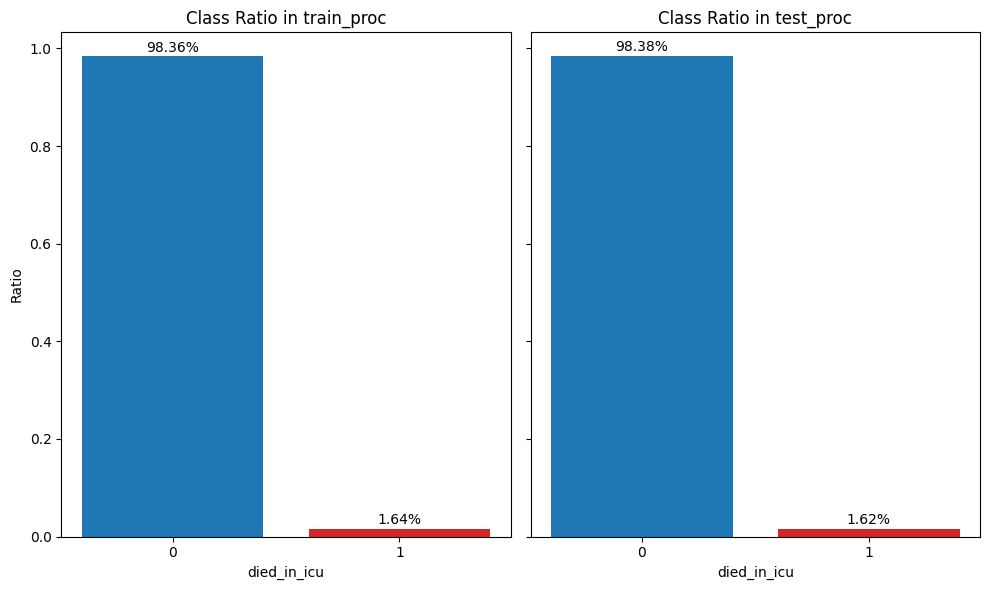

In [ ]:
import matplotlib.pyplot as plt

target_col = "died_in_icu"

datasets = {
    "train_proc": train_df,
    "test_proc": test_df,
}

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

for ax, (name, df) in zip(axes, datasets.items()):
    counts = df[target_col].value_counts().sort_index()
    ratios = counts / counts.sum()

    ax.bar(ratios.index.astype(str), ratios.values, color=["tab:blue", "tab:red"])
    ax.set_xlabel(target_col)
    ax.set_title(f"Class Ratio in {name}")

    for i, v in enumerate(ratios.values):
        ax.text(i, v + 0.01, f"{v:.2%}", ha="center")

axes[0].set_ylabel("Ratio")
plt.tight_layout()
plt.show()


=== Missing Value Top 10 ===
           Null Count  Null Ratio (%)
feature34     4868421       99.996981
feature30     4867595       99.980015
feature14     4842196       99.458321
feature28     4827069       99.147614
feature16     4816094       98.922188
feature13     4815977       98.919785
feature17     4815439       98.908735
feature15     4815243       98.904709
feature31     4745424       97.470632
feature32     4688780       96.307169


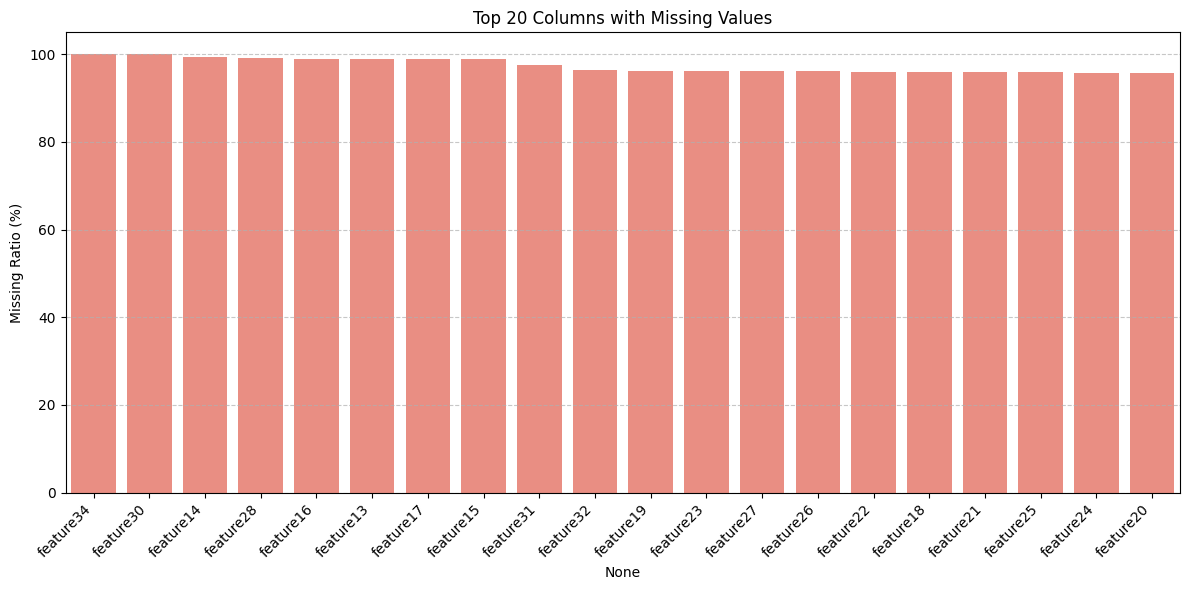

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = train_df

null_info = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Ratio (%)': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Null Ratio (%)', ascending=False)

high_nulls = null_info[null_info['Null Ratio (%)'] > 0]

print("=== Missing Value Top 10 ===")
print(high_nulls.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=high_nulls.index[:20], y=high_nulls['Null Ratio (%)'][:20], color='salmon') # 상위 20개만
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Columns with Missing Values')
plt.ylabel('Missing Ratio (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

                          min           max          mean           50%  \
patientunitstayid  30000646.0  3.999923e+07  3.493579e+07  3.491193e+07   
patient_id         10000032.0  1.999999e+07  1.498160e+07  1.496607e+07   
observationoffset         0.0  8.572800e+04  8.579489e+03  4.090000e+03   
feature15                 0.0  9.970000e+03  2.548661e+02  5.200000e+01   
feature13                 0.0  5.000000e+03  1.857775e+02  4.000000e+01   
feature16                 7.0  2.979000e+03  1.418749e+02  9.800000e+01   
feature22                 4.0  6.000000e+02  1.407358e+02  1.270000e+02   
feature35                 0.0  5.357333e+02  4.873700e-02  0.000000e+00   
feature27                30.0  5.000000e+02  1.281702e+02  1.040000e+02   
feature36                 0.0  3.183833e+02  5.813749e+00  3.866667e+00   

                            std  
patientunitstayid  2.868877e+06  
patient_id         2.901795e+06  
observationoffset  1.127160e+04  
feature15          8.201492e+02  
feat

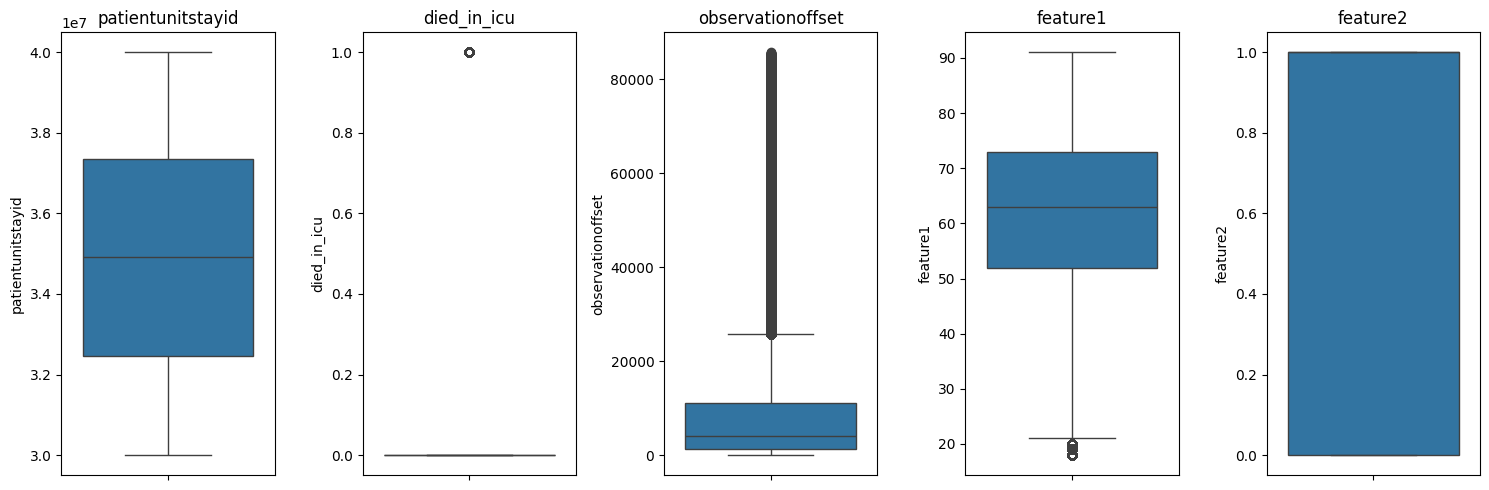

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

stats_df = df[numeric_cols].describe().T
stats_df = stats_df[['min', 'max', 'mean', '50%', 'std']]

print(stats_df.sort_values(by='max', ascending=False).head(10))

cols_to_plot = numeric_cols[:5]

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 1. 매핑 정보 정의
feature_mapping = {
    'feature1': 'Age', 'feature2': 'Sex', 'feature3': 'RespRate', 'feature4': 'HeartRate',
    'feature5': 'SysBP', 'feature6': 'DiasBP', 'feature7': 'Temp', 'feature8': 'O2Sat',
    'feature9': 'GCS_Motor', 'feature10': 'GCS_Verbal', 'feature11': 'GCS_Eye', 'feature12': 'FiO2',
    'feature13': 'ALT', 'feature14': 'Albumin', 'feature15': 'AST', 'feature16': 'ALP',
    'feature17': 'Bilirubin', 'feature18': 'BUN', 'feature19': 'Calcium', 'feature20': 'Chloride',
    'feature21': 'Creatinine', 'feature22': 'Glucose', 'feature23': 'Hgb', 'feature24': 'Hct',
    'feature25': 'Bicarbonate', 'feature26': 'pCO2', 'feature27': 'pO2', 'feature28': 'Platelets',
    'feature29': 'Potassium', 'feature30': 'TotalProtein', 'feature31': 'INR', 'feature32': 'RBC',
    'feature33': 'Sodium', 'feature34': 'WBC', 'feature35': 'delta_vital', 'feature36': 'delta_lab'
}

# 2. 데이터 로드 및 컬럼명 변경
df = df.rename(columns=feature_mapping)

# 3. ID 컬럼 제거 (존재하는 경우에만)
cols_to_drop = ['patientunitstayid', 'patient_id']
existing_cols = [c for c in cols_to_drop if c in df.columns]
df_clean = df.drop(columns=existing_cols)

print(f"Final Data Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")

# 이제 df_clean을 사용하여 분석/학습을 진행하시면 됩니다.

Final Data Shape: (4868568, 38)
Columns: ['died_in_icu', 'observationoffset', 'Age', 'Sex', 'RespRate', 'HeartRate', 'SysBP', 'DiasBP', 'Temp', 'O2Sat', 'GCS_Motor', 'GCS_Verbal', 'GCS_Eye', 'FiO2', 'ALT', 'Albumin', 'AST', 'ALP', 'Bilirubin', 'BUN', 'Calcium', 'Chloride', 'Creatinine', 'Glucose', 'Hgb', 'Hct', 'Bicarbonate', 'pCO2', 'pO2', 'Platelets', 'Potassium', 'TotalProtein', 'INR', 'RBC', 'Sodium', 'WBC', 'delta_vital', 'delta_lab']


Top 15 features correlated with died_in_icu:
GCS_Motor      -0.186859
AST             0.161697
GCS_Eye        -0.151016
INR             0.142216
Bicarbonate    -0.130889
TotalProtein   -0.106312
Bilirubin       0.102327
FiO2            0.099688
GCS_Verbal     -0.098971
Potassium       0.093273
O2Sat          -0.089369
Albumin        -0.080717
ALT             0.070566
HeartRate       0.065008
SysBP          -0.058168
Name: died_in_icu, dtype: float64


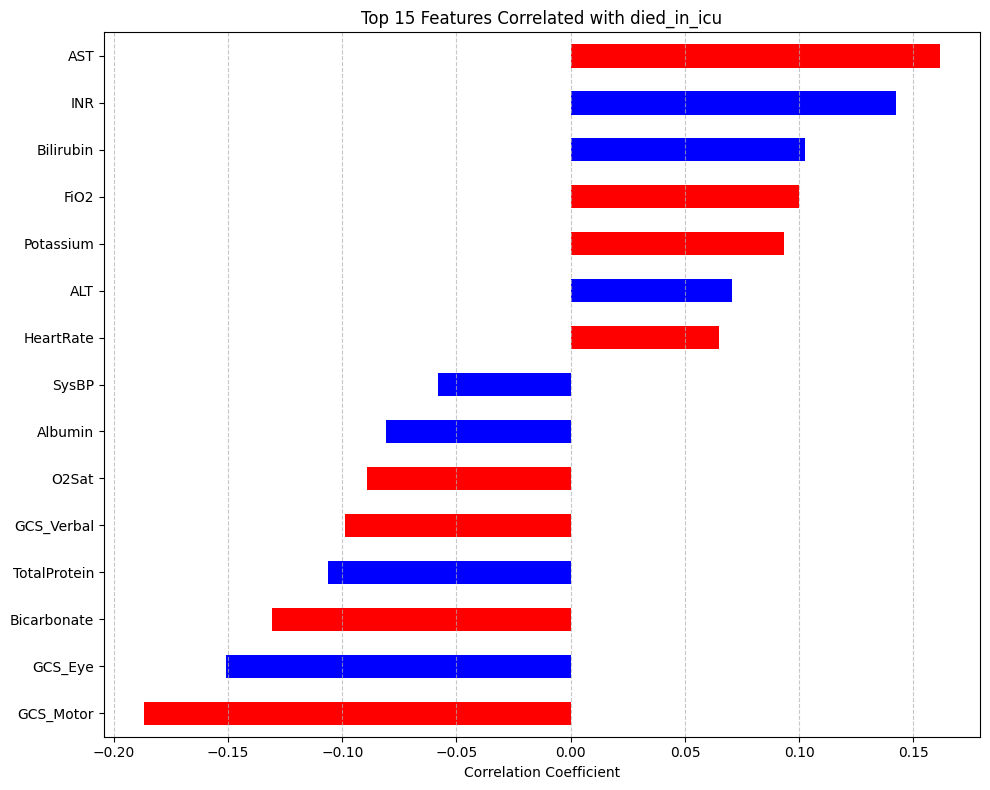

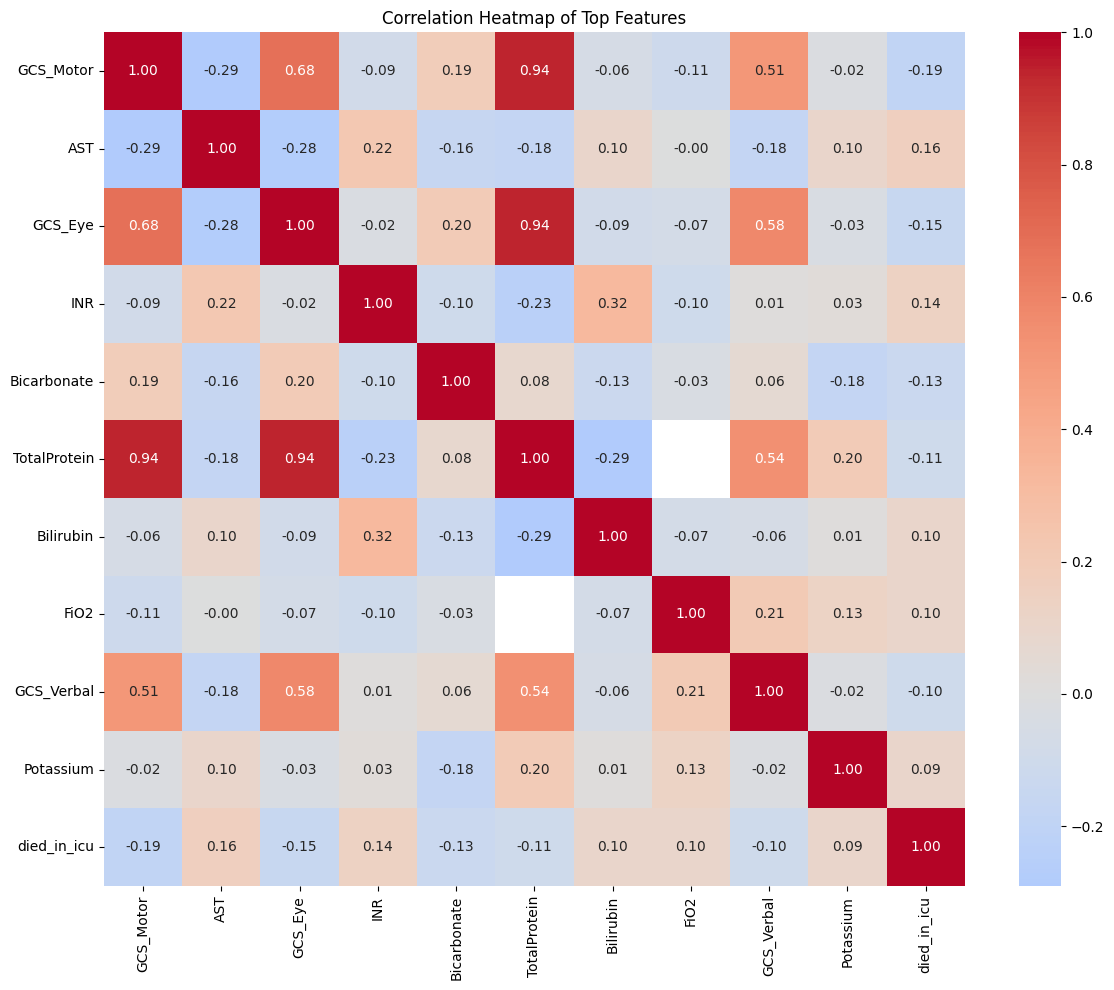

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load Data
# Check for available files
file_path = "/content/drive/MyDrive/final_dataset/29757_test_merged.csv"
if not os.path.exists(file_path):
    # Fallback to check other potential names if the specific one isn't found
    files = [f for f in os.listdir('.') if f.endswith('.csv')]
    if files:
        file_path = files[0]

if os.path.exists(file_path):
    df = pd.read_csv(file_path)

    # 2. Rename Columns
    feature_mapping = {
        'feature1': 'Age', 'feature2': 'Sex', 'feature3': 'RespRate', 'feature4': 'HeartRate',
        'feature5': 'SysBP', 'feature6': 'DiasBP', 'feature7': 'Temp', 'feature8': 'O2Sat',
        'feature9': 'GCS_Motor', 'feature10': 'GCS_Verbal', 'feature11': 'GCS_Eye', 'feature12': 'FiO2',
        'feature13': 'ALT', 'feature14': 'Albumin', 'feature15': 'AST', 'feature16': 'ALP',
        'feature17': 'Bilirubin', 'feature18': 'BUN', 'feature19': 'Calcium', 'feature20': 'Chloride',
        'feature21': 'Creatinine', 'feature22': 'Glucose', 'feature23': 'Hgb', 'feature24': 'Hct',
        'feature25': 'Bicarbonate', 'feature26': 'pCO2', 'feature27': 'pO2', 'feature28': 'Platelets',
        'feature29': 'Potassium', 'feature30': 'TotalProtein', 'feature31': 'INR', 'feature32': 'RBC',
        'feature33': 'Sodium', 'feature34': 'WBC', 'feature35': 'delta_vital', 'feature36': 'delta_lab'
    }
    df = df.rename(columns=feature_mapping)

    # 3. Drop ID columns
    cols_to_drop = ['patientunitstayid', 'patient_id']
    df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

    # 4. Calculate Correlations
    target_col = 'died_in_icu'
    if target_col in df_clean.columns:
        # Correlation with target
        correlations = df_clean.corr()[target_col].drop(target_col)
        # Sort by absolute value
        top_correlations = correlations.abs().sort_values(ascending=False).head(15)

        # Get the actual correlation values (with sign) for the top abs correlated features
        top_corr_signed = correlations[top_correlations.index]

        print("Top 15 features correlated with died_in_icu:")
        print(top_corr_signed)

        # 5. Visualization
        plt.figure(figsize=(10, 8))

        # Bar chart for correlation with target
        colors = ['red' if x < 0 else 'blue' for x in top_corr_signed.values]
        top_corr_signed.sort_values().plot(kind='barh', color=colors)
        plt.title('Top 15 Features Correlated with died_in_icu')
        plt.xlabel('Correlation Coefficient')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('target_correlation_bar.png')

        # Heatmap for Top Features (inter-correlation)
        # Select top 10 features + target
        top_features = top_correlations.index[:10].tolist()
        heatmap_data = df_clean[top_features + [target_col]].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap of Top Features')
        plt.tight_layout()
        plt.savefig('feature_heatmap.png')

        plt.show()

    else:
        print("Target column 'died_in_icu' not found.")
else:
    print("Dataset not found.")